# 实验二：回归模型

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系

## 实验要求
### 截止日期：10月22日
作业的提交格式参考之前的说明，提交到18329300691@163.com
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

## 线性回归

线性回归模型(Linear Regression)，因为结构简单，可解释性好，实现简单，在工程领域得到广泛应用。

首先对线性函数进行简单的回顾：

![a.png](https://s2.loli.net/2022/10/04/rdm5WLI84BNznUR.png)

### 预测模型

首先，我们明确几个常用的数学符号：
- 特征 (features): $x_i$, 比如房屋的面积，卧室的数量都可以是房屋的特征
- 特征向量 (输入): $x$, 若干个特征组成的向量，代表一套房屋的所有信息。例如，$x^{(i)}_j$ 表示第 $i$ 套房的第 $j$ 个特征
- 输出向量 $y$, $y^{(i)}$ 表示第 $i$ 个输入对应的输出
- 假设 (hypothesis): 也称预测函数，比如一个线性的预测函数是：
$$h_\theta (x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta^T x$$
上述的表达式就是**回归方程 (regression equation)**, $\theta$ 就是回归系数，关系到我们预测的准确程度

## 一元线性回归 vs. 多元线性回归

假设一共有N个特征向量，对于多元线性回归有m个特征：
- 数据集：
   - 一元：$\{(x^{(i)}, y^{(i)})\}$  
   - 多元：$\{(\pmb{x}^{(i)}, y^{(i)})\},\\ \pmb{x}^{(i)}=[x^{(i)}_1, x^{(i)}_2,..., x^{(i)}_m], i=1,2,...,N$


- 假设：
  - 一元：$f(x^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}$ 
  - 多元：$f(\pmb{x}^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}_1+\theta_2x^{(i)}_2 + ... +\theta_mx^{(i)}_m $
  
- 参数：
  - 一元：$\pmb{\theta}=[\theta_0, \theta_1]$
  - 多元：$\pmb{\theta}=[\theta_0, \theta_1,\theta_2, ...,\theta_m]$

- 损失函数：
  - MSE：$$Loss=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  有的资料上损失函数多了个$\frac{1}{2}$：
  $$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  目的是求导后将二次项的系数变为1，加和不加对结果理论上没有影响。
- 目标：损失函数最小

- 解析解：
  - 一元：分别对MSE中的$\theta_0, \theta_1$求偏导
  
  - 多元：对MSE中的$\pmb{\theta}$求偏导
  $\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$

### 优化方法
 - 直接求解析解：$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$
   - 优点：不需要试错，可以直接取得最小值，比较快捷。

   - 缺点：当特征过于复杂时，无法求逆。

   - 适用于：小数据场景。（梯度下降相对用的更多一些）
 - 梯度下降法
 - 岭回归

### 梯度下降法

![image.png](https://s2.loli.net/2022/10/04/XOjpPcdCksRwQn8.png)

### 学习率

![image.png](https://s2.loli.net/2022/10/04/OfuUjWLSJF3qyso.png)

### winequality-white数据集

In [9]:
# 定义MSE
def MSE(X, Y, W):https://s2.loli.net/2022/10/04/u6YUkgCxZ7s48ft.png
    return np.sum(np.power((np.dot(X, W) - Y), 2)) / Y.size

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from collections import Counter
import copy
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


最后一列是质量的评级，前面其他的都是酒的特征

### 对数据集进行预处理

对数据集的预处理是一个十分重要的步骤，能够使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。

常用的预处理方法有：标准化、归一化和中心化。同学们根据需要从中选择一种或几种方法进行预处理（采用其他方法亦可）。

![image.png](https://s2.loli.net/2022/10/04/WqxB76cXLGtePSK.png)

In [5]:
# 中心化代码
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X1 = data.iloc[:, 0:-1]  # N D
X1 = Normalization_fun(X)
Y1 = data.iloc[:, -1]

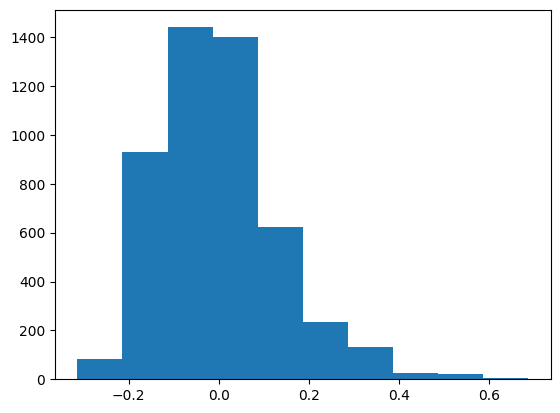

In [89]:
# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X1["sulphates"])
plt.show()

In [44]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data0 = pd.concat([pd.DataFrame(np.ones(X1.shape[0]), columns=['x0']), X1], axis=1)
data0

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495
1,1.0,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591
2,1.0,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817
3,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
4,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,-0.062960,-0.066903,-0.026621,-0.073488,-0.020096,-0.039401,-0.107565,-0.055666,0.074303,0.011806,0.110602
4894,1.0,-0.024499,0.040940,0.015547,0.024672,0.003643,0.075582,0.068769,0.016823,-0.034788,-0.034706,-0.147462
4895,1.0,-0.034114,-0.037491,-0.086862,-0.079623,-0.014161,-0.018495,-0.063482,-0.028675,-0.180242,-0.034706,-0.179720
4896,1.0,-0.130268,0.011528,-0.020597,-0.081157,-0.070541,-0.053338,-0.065802,-0.102899,0.137939,-0.127729,0.368667


In [45]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1], 1)
W_init

array([[-1.76237782],
       [ 0.9075816 ],
       [-0.65060283],
       [ 0.57753554],
       [-0.13410966],
       [ 0.77565845],
       [ 1.06676356],
       [ 2.71843444],
       [ 1.19597966],
       [ 0.40006746],
       [-1.54951645],
       [-0.78086618]])

In [92]:
## TODO：批量梯度下降
## TODO：随机梯度下降
## TODO：回归模型在机器学习和统计学上的差异
## TODO：岭回归

# 一、初级要求

In [6]:
# 数据中心化预处理
X = data.iloc[:, 0:-1]
data.iloc[:, 0:-1] = Normalization_fun(X)
train_rate = 0.8 # 划分比例
# data.describe()
# 分层抽样得到训练集数据
train_data = data.groupby('quality').apply(lambda group : group.sample(frac=train_rate)) 
train_data.index = train_data.index.droplevel()
# 测试集数据
test_data = data[~data.index.isin(train_data.index)] 
# 重置索引
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [7]:
# 提取数据特征和标签
train_X = train_data.iloc[:, 0:-1]
test_X = test_data.iloc[:, 0:-1]
train_Y = train_data.iloc[:, -1]
test_Y = test_data.iloc[:, -1]

# 在训练集和测试集左侧添加全为1的列
train_X = pd.concat([pd.DataFrame(np.ones(train_X.shape[0]), columns=['x0']), train_X], axis=1)
test_X = pd.concat([pd.DataFrame(np.ones(test_X.shape[0]), columns=['x0']), test_X], axis=1)
# 将数据转换为numpy.ndarray格式
train_X = np.array(train_X)
train_Y = np.array(train_Y)
train_Y = train_Y.reshape(-1, 1)
test_X = np.array(test_X)
test_Y = np.array(test_Y)
test_Y = test_Y.reshape(-1, 1)

## 1. 批量梯度下降

批量梯度下降法为最小化所有训练样本的损失函数，使得最终求解的是全局的最优解。


![image.png](https://s2.loli.net/2022/10/04/TB4DmndiJ9OVPYk.png)

In [8]:
# 初始化回归系数https://s2.loli.net/2022/10/04/TB4DmndiJ9OVPYk.png
W_init = np.random.randn(train_X.shape[1], 1)
W_init

array([[-0.48244803],
       [-0.94898541],
       [ 0.61763109],
       [ 1.40679418],
       [-1.04261767],
       [-0.11494954],
       [-0.32894388],
       [ 1.69400825],
       [-0.09625581],
       [ 0.03120139],
       [-0.95337314],
       [-0.20332569]])

In [10]:
def BGD(train_X, train_Y, test_X, test_Y, theta, alpha, epochs):
    # 复制初始参数 theta
    theta = copy.deepcopy(theta)
    
    # 初始化用于存储训练误差和测试误差的列表
    BGD_MSE_train = []
    BGD_MSE_test = []
    
    # 计算初始训练误差和测试误差并将其添加到列表中
    BGD_MSE_train.append(MSE(train_X, train_Y, theta))
    BGD_MSE_test.append(MSE(test_X, test_Y, theta))
    
    # 执行多轮梯度下降迭代
    for i in range(epochs):
        for j in range(theta.size):
            # 获取训练数据的第 j 列作为特征
            Xj = train_X[:, j].reshape(-1, 1)
            
            # 使用批量梯度下降更新模型参数 theta[j]
            theta[j] = theta[j] + alpha * np.sum((train_Y - np.dot(train_X, theta)) * Xj) / train_Y.size
        
        # 计算当前轮次的训练误差和测试误差并将其添加到列表中
        BGD_MSE_train.append(MSE(train_X, train_Y, theta))
        BGD_MSE_test.append(MSE(test_X, test_Y, theta))
    
    # 返回训练后的参数 theta 以及训练误差和测试误差的列表
    return theta, BGD_MSE_train, BGD_MSE_test

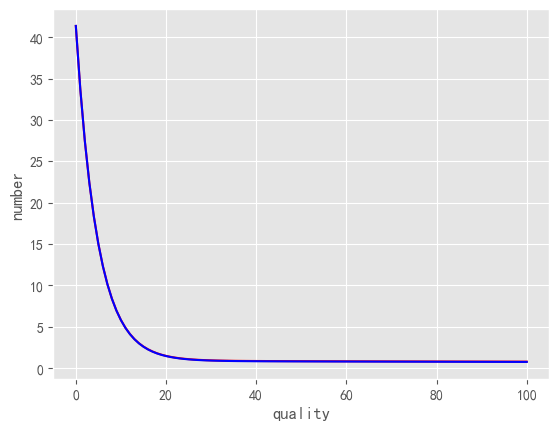

In [40]:
alpha = 0.1
epochs = 100
BGD_theta, BSD_MSE_train, BSD_MSE_test = BGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
plt.style.use('ggplot')
plt.figure()
plt.plot(range(epochs+1),BSD_MSE_train, 'r')
plt.plot(range(epochs+1),BSD_MSE_test, 'b')
plt.xlabel("quality")
plt.ylabel("number")
# 显示图
plt.show()

## 2. 随机梯度下降

虽然批量梯度下降能够收敛到最小值，但每调节一个$\theta_j$都必须遍历一遍样本集，如果样本的体积m很大，那么这种算法开销巨大，但由于其向量表示，可以利用并行计算优化性能。

![image.png](https://s2.loli.net/2022/10/04/u6YUkgCxZ7s48ft.png)

In [12]:
def SGD(train_X, train_Y, test_X, test_Y, theta, alpha, epochs):
    # 深拷贝输入数据，防止修改原始数https://s2.loli.net/2022/10/04/u6YUkgCxZ7s48ft.png据
    train_X = copy.deepcopy(train_X)
    theta = copy.deepcopy(theta)
    SGD_MSE_train = []  # 用于存储每个训练迭代后的训练集MSE值
    SGD_MSE_test = []   # 用于存储每个训练迭代后的测试集MSE值
    SGD_MSE_train.append(MSE(train_X, train_Y, theta))  # 计算初始训练集MSE值
    SGD_MSE_test.append(MSE(test_X, test_Y, theta))    # 计算初始测试集MSE值

    for i in range(epochs):
        np.random.shuffle(train_X)  # 随机打乱训练集样本顺序
        for k in range(train_Y.size):
            Y_i = train_Y[i, :].reshape(-1, 1)  # 获取第i个训练样本的标签
            X_i = train_X[i, :].reshape(1, -1)   # 获取第i个训练样本的特征
            for j in range(theta.size):
                Xj = train_X[i, j].reshape(-1, 1)  # 获取特征矩阵的第j列
                # 更新模型参数 theta[j]，应用随机梯度下降更新规则
                theta[j] = theta[j] + alpha * np.sum((Y_i - np.dot(X_i, theta)) * Xj)
        
        # 计算并记录每次迭代后的训练集MSE和测试集MSE
        SGD_MSE_train.append(MSE(train_X, train_Y, theta))
        SGD_MSE_test.append(MSE(test_X, test_Y, theta))
    
    # 返回训练后的模型参数和MSE值列表
    return theta, SGD_MSE_train, SGD_MSE_test


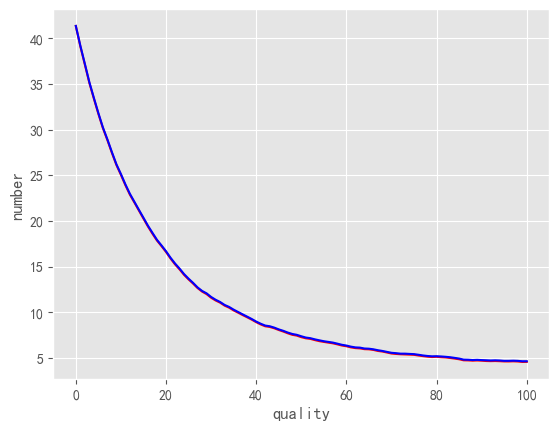

In [39]:
alpha = 0.00001
epochs = 100
SGD_theta, SGD_MSE_train, SGD_MSE_test = SGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
plt.figure()
plt.plot(range(epochs+1),SGD_MSE_train, 'r')
plt.plot(range(epochs+1),SGD_MSE_test, 'b')
plt.xlabel("quality")
plt.ylabel("number")
# 显示图
plt.show()

## 3. MSE曲线展示

In [55]:
# 训练轮数
epochs = 50
# 学习率
alphas = [2, 1, 0.5, 0.1, 0.01, 0.001]
BGD_train = []
BGD_test = []
SGD_train = []
SGD_test = []
for alpha in alphas:
    BGD_theta, BSD_MSE_train, BSD_MSE_test = BGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
    BGD_train.append(BSD_MSE_train)
    BGD_test.append(BSD_MSE_test)
for alpha in alphas:
    SGD_theta, SGD_MSE_train, SGD_MSE_test= SGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
    SGD_train.append(SGD_MSE_train)
    SGD_test.append(SGD_MSE_test)

C:\Users\25265\AppData\Local\Temp\ipykernel_29408\1979619471.py:3: RuntimeWarning: overflow encountered in power
  return np.sum(np.power((np.dot(X, W) - Y), 2)) / Y.size
C:\Users\25265\AppData\Local\Temp\ipykernel_29408\570782488.py:16: RuntimeWarning: overflow encountered in scalar multiply
  theta[j] = theta[j] + alpha * np.sum((Y_i - np.dot(X_i, theta)) * Xj)


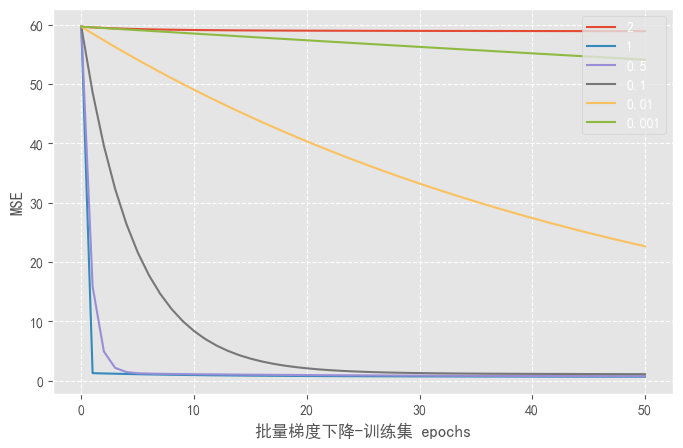

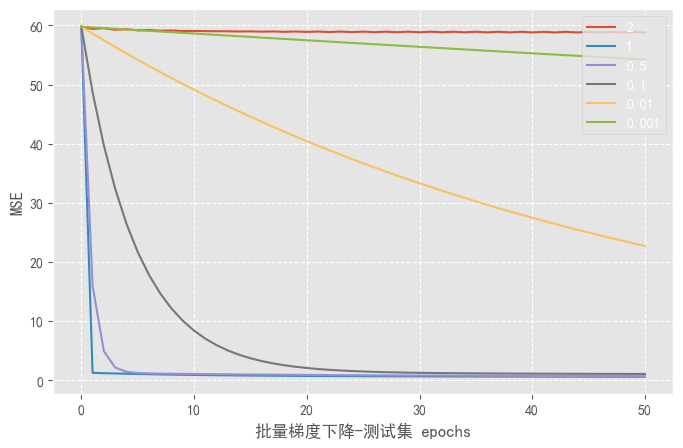

In [57]:
# 画图
plt.rcParams['font.sans-serif']=['SimHei']   #用来正常显示中文标签
plt.style.use('ggplot')
# 批量梯度下降-训练集
plt.figure(figsize=(8, 5), dpi=100)
plt.grid(linestyle="--")
plt.xlabel("批量梯度下降-训练集 epochs")
plt.ylabel("MSE")
for i in range(len(alphas)):
    plt.plot(range(epochs + 1), BGD_train[i])
plt.legend(alphas,loc='upper right')

# 批量梯度下降-测试集
plt.figure(figsize=(8, 5), dpi=100)
plt.grid(linestyle="--")
plt.xlabel("批量梯度下降-测试集 epochs")
plt.ylabel("MSE")
for i in range(len(alphas)):
    plt.plot(range(epochs + 1), BGD_test[i])
plt.legend(alphas,loc='upper right')

#### 实验过程调整
经过多次实验,当取学习率为 0.1, 0.01, 0.001, 0.0001,000001 最为合适,且改边epochs最大训练论数为30即可发现曲线拟合,具体实验代码及效果如下图所示

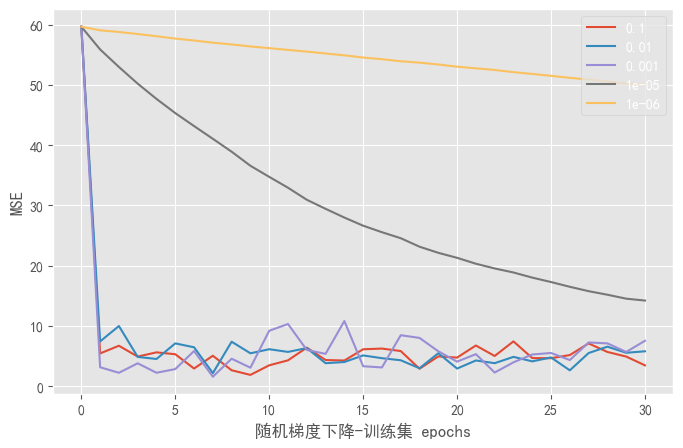

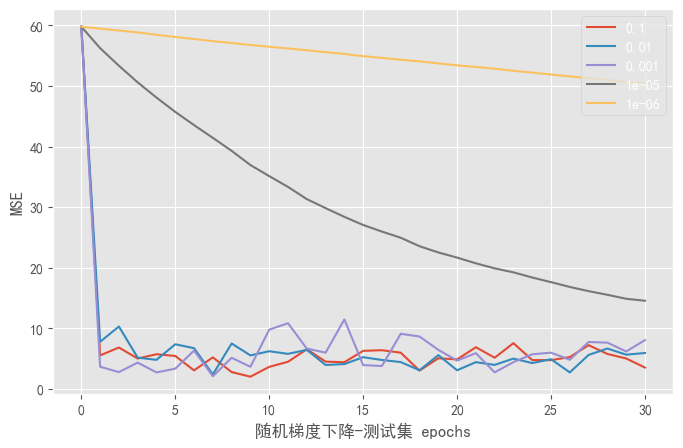

In [58]:
# 训练轮数
epochs = 30
# 学习率列表
alphas = [0.1, 0.01, 0.001, 0.00001, 0.000001]

BGD_train = []  # 用于存储批量梯度下降的训练集MSE
BGD_test = []   # 用于存储批量梯度下降的测试集MSE
SGD_train = []  # 用于存储随机梯度下降的训练集MSE
SGD_test = []   # 用于存储随机梯度下降的测试集MSE

# 遍历不同的学习率
for alpha in alphas:
    # 使用随机梯度下降训练模型，记录训练集和测试集的MSE值
    SGD_theta, SGD_MSE_train, SGD_MSE_test = SGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
    SGD_train.append(SGD_MSE_train)
    SGD_test.append(SGD_MSE_test)

# 绘制随机梯度下降训练和测试集的MSE曲线

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

# 随机梯度下降-训练集
plt.figure(figsize=(8, 5), dpi=100)
plt.xlabel("随机梯度下降-训练集 epochs")
plt.ylabel("MSE")
for i in range(len(alphas)):
    plt.plot(range(epochs + 1), SGD_train[i])
plt.legend(alphas, loc='upper right')

# 随机梯度下降-测试集
plt.figure(figsize=(8, 5), dpi=100)
plt.xlabel("随机梯度下降-测试集 epochs")
plt.ylabel("MSE")
for i in range(len(alphas)):
    plt.plot(range(epochs + 1), SGD_test[i])
plt.legend(alphas, loc='upper right')

# 显示图形
plt.show()


### 不同学习率对MSE曲线影响分析
#### 结论一: 

在回归任务中，学习率的选择对于批量梯度下降和随机梯度下降不同。对于批量梯度下降，当学习率过大时，模型收敛速度较慢。当学习率太小时，曲线收敛效果不佳。最佳学习率通常在0.1到1之间，此时MSE曲线收敛效果最好。对于随机梯度下降，小学习率（例如1e-06）导致模型收敛表现不佳，而适中的学习率（例如0.001）可以加速收敛但在收敛后出现波动。总的来说，批量梯度下降在不同学习率下表现更稳定和出色。

#### 结论二: 

学习率大小的影响因模型而异。不同的优化算法对学习率的敏感度各不相同，因此应根据具体情况选择合适的学习率范围进行测试。模型表现的好坏和学习率的选择密切相关，需要因地制宜。

#### 结论三: 

训练轮数的选择也应根据具体情况而定。例如，随机梯度下降通常可以减少训练轮数以节省时间，因为它收敛更快。特别是在大规模数据或大型模型的情况下，减少训练轮数对于提高效率非常重要，尤其是在GPU性能有限的情况下。

# 二、中级要求
### 回归模型在机器学习和统计学上的差异

#### 1. 目的不同：

机器学习：在机器学习中，回归模型通常用于预测或估计目标变量的值。这些模型可以应用于各种任务，如分类、回归、聚类等，但主要目的是使模型具有良好的泛化能力，以在未来数据上表现良好。

统计学：在统计学中，回归模型通常用于了解和解释变量之间的关系。统计回归的主要目的是研究自变量如何影响因变量，并评估模型的拟合程度以进行假设检验。统计回归通常用于验证特定的统计假设。

#### 2. 数据处理：

机器学习：机器学习中的回归模型通常处理大量的复杂数据，包括结构化和非结构化数据。特征工程在机器学习中起着关键作用，可以从原始数据中提取有用的特征，以提高模型性能。

统计学：统计学中的回归模型通常更关注数据的清洗和分析，以确保满足统计假设。统计回归通常要求数据满足线性性、正态性、独立性等假设。

#### 3. 模型选择和评估：

机器学习：机器学习通常使用各种回归算法和模型，包括线性回归、决策树回归、支持向量回归等。模型选择和评估通常依赖于交叉验证、损失函数和性能指标，如均方误差（MSE）或平均绝对误差（MAE）。

统计学：统计学通常更依赖于经典线性回归模型，如普通最小二乘（OLS）回归。模型的选择和评估通常涉及参数估计、置信区间和假设检验。

#### 4. 复杂性和解释性：

机器学习：机器学习模型通常更复杂，可以处理高维数据和非线性关系。这些模型在预测任务上通常表现出色，但可能难以解释。

统计学：统计回归模型通常更简单，对变量之间的关系提供更多的解释。它们可能受到更多统计假设的限制，但有助于理解数据背后的机制。

总的来说，机器学习中的回归模型更侧重于预测和泛化，而统计学中的回归模型更侧重于了解和解释数据。不过，这些领域之间的界限变得模糊，因为统计方法在机器学习中也得到广泛应用，而机器学习方法在统计分析中也被采用。

# 三、高级要求

## 岭回归实现

公式$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$不可逆原因:

- 矩阵可逆的充要条件：满秩；
- 存在噪声维，使得特征间存在线性关系，导致矩阵的秩小于特征维度；
- 特征数比样本还多的时候，方程的个数比未知数的个数还要少，所以会导致矩阵的秩小于样本数,无穷多解满足该情况，进而矩阵不可逆。

为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

而岭回归模型的目标函数在线性模型的基础上加了L2范数的惩罚项：
$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2+\lambda \sum_{j=0}^N\theta_j^2$$
当岭参数$\lambda$时，得到最小二乘解，当岭参数$\lambda$趋向更大时，岭回归系数 $\pmb{\theta}$ 估计趋向于0。
从岭回归的原理可以知道，岭回归就是改良后的最小二乘估计法，通过放弃最小二乘法的无偏性，通过损失部分特征信息，降低模型精度来得到更符合实际情况的回归系数。

In [52]:
def RidgeRegression(train_X, train_Y, L2_lambda):
    # 转换训练数据为矩阵
    xMat = np.mat(train_X)
    yMat = np.mat(train_Y)
    
    # 计算 X^T * X
    xTx = xMat.T * xMat
    
    # 岭回归的核心计算：X^T * X + lambda * I，其中 I 是单位矩阵
    rxTx = xTx + np.eye(xMat.shape[1]) * L2_lambda
    
    # 计算矩阵的行列式，如果行列式为0，说明逆矩阵不存在
    if np.linalg.det(rxTx) == 0.0:
        return
    
    # 计算岭回归的参数 theta
    theta = rxTx.I * xMat.T * yMat
    
    return theta

# 使用岭回归训练模型
theta = RidgeRegression(train_X, train_Y, 0.5)

# 计算训练误差和测试误差
train_MSE = MSE(train_X, train_Y, theta)
test_MSE = MSE(test_X, test_Y, theta)

# 打印结果
print("平均训练误差为:")
print(train_MSE)
print(f"平均测试误差为:")
print(test_MSE)

平均训练误差为:
0.5722951171100225
平均测试误差为:
0.5422130912124308
